In [1]:
from scipy.io import netcdf
from scipy.io import loadmat
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt
import timeit

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

from scipy import integrate

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

%matplotlib inline
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
from python_functions import *

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
#import timeit
#start = timeit.default_timer()
#run_pert0 = StateRead()        
#run_pert0.readData('/scratch/general/am8e13/results_restore/',range(0,605,2))
#run_pert0.title('The old perturbation run')
#run_pert0.baroCalc()
#run_pert0.topoCalc()
#run_pert0.fluxCalc()
#stop = timeit.default_timer()
#print stop - start 

In [3]:
import timeit
start = timeit.default_timer()
run_pert2 = StateRead()        
run_pert2.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/',range(0,605,2))
run_pert2.title('First new run, no restore to normal')
run_pert2.baroCalc()
run_pert2.topoCalc()
run_pert2.fluxCalc()
#run_pert2.vorticity(range(0,305,10))
#run_pert2.seaiceread(range(0,249,10))
stop = timeit.default_timer()
print stop - start 

196.405343056


/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [4]:
#start = timeit.default_timer()
#run_pert1 = StateRead()        
#run_pert1.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation1/results/',range(0,605,2))
#run_pert1.title('First new run with restore to normal')
#run_pert1.baroCalc()
#run_pert1.topoCalc()
#run_pert1.fluxCalc()

In [5]:
start = timeit.default_timer()
run_pert18 = StateRead()        
run_pert18.readData('/hpcdata/scratch/am8e13/arctic420x384/run_perturbation/results/',range(0,800,5))
run_pert18.title('First new run with restore to normal')
run_pert18.baroCalc()
run_pert18.topoCalc()
run_pert18.fluxCalc()
#run_pert18.vorticity(range(0,200,10))
stop = timeit.default_timer()
print stop - start 

2124.94616008


In [56]:
start = timeit.default_timer()

run_pert2.vorticity(range(0,305,10))
run_pert2.seaiceread(range(0,249,10))
run_pert18.vorticity(range(0,250,10))

stop = timeit.default_timer()
print stop - start 

60.4546329975


In [6]:
pert0 = MonitorRead()        
pert0.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_restore/results/',\
               [10069920,10588320,10614240,10717920,10743840,11262240])
pert0.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_restore/results/',\
                    [10069920,10588320,10614240,10717920,10743840,11262240])
pert0.title('Old restore run','blue')

pert1 = MonitorRead()        
pert1.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation1/results/',\
               [5702400,6220800,6246720,6350400,6454080,6972480])
pert1.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation1/results/',\
                    [5702400,6220800,6246720,6350400,6454080,6972480])
pert1.title('First new run with restore to normal','red')

pert2 = MonitorRead()        
pert2.readData('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/',[5702400,6220800,6246720,6972480])
pert2.readDynStDiag('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/',[5702400,6220800,6246720,6972480])
pert2.title('First new run, no restore to normal','black')

In [7]:
pert_18km = MonitorRead()        
pert_18km.readData('/hpcdata/scratch/am8e13/arctic420x384/run_perturbation/results/',[4717440,4924800,5132160,5235840,5261760])
pert_18km.readDynStDiag('/hpcdata/scratch/am8e13/arctic420x384/run_perturbation/results/',[4717440,4924800,5132160,5235840,5261760])
pert_18km.title('First 18km run','grey')

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:71: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
titles_lv = { 
                'run_ERA_tempcorr0' : 'ERA run with OBS*0.5' , 'run_JRA_tempcorr0' : 'JRA run with OBS*0.5', \
                'run_ERA_tempcorr1' : 'ERA run with OBS*0.8' , 'run_JRA_tempcorr1' : 'JRA run with OBS*0.8', \
                'run_ERA_tempcorr2' : 'ERA run with OBS*0.65' , 'run_JRA_tempcorr2' : 'JRA run with OBS*0.65'
            }

In [9]:
monitor_list = {'pert1' : pert1, 'pert2' : pert2, 'pert0' : pert0 , 'pert_18km' : pert_18km}

First 18km run grey
Old restore run blue
First new run with restore to normal red
First new run, no restore to normal black


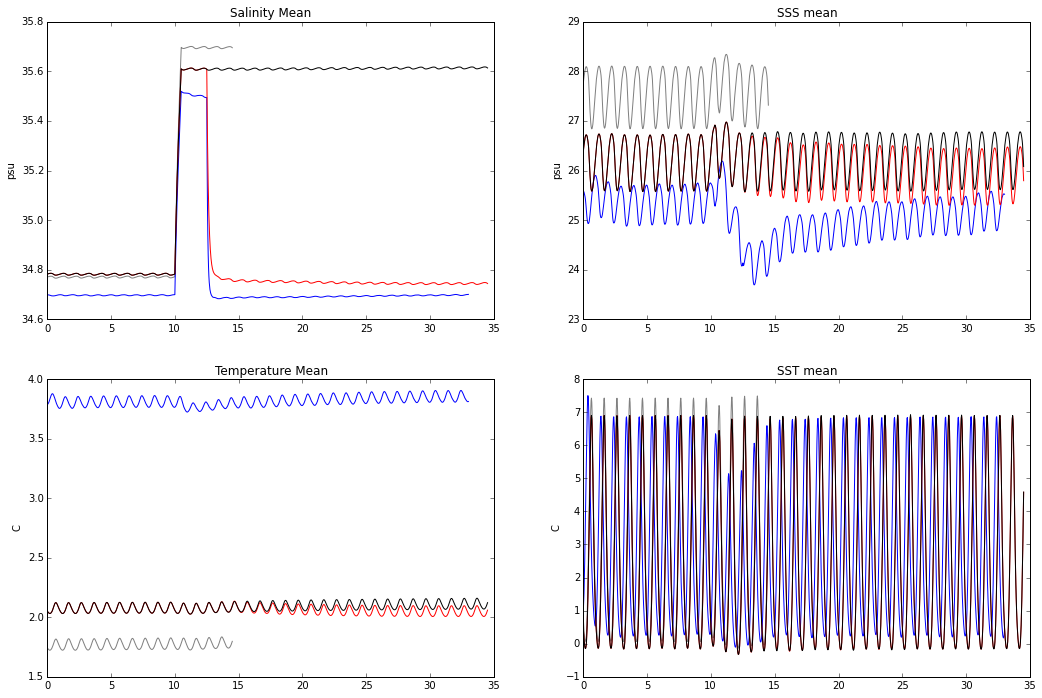

In [10]:
plot_monitor(monitor_list,['salt_mean','sss_mean','theta_mean','sst_mean'])

First 18km run grey
Old restore run blue
First new run with restore to normal red
First new run, no restore to normal black


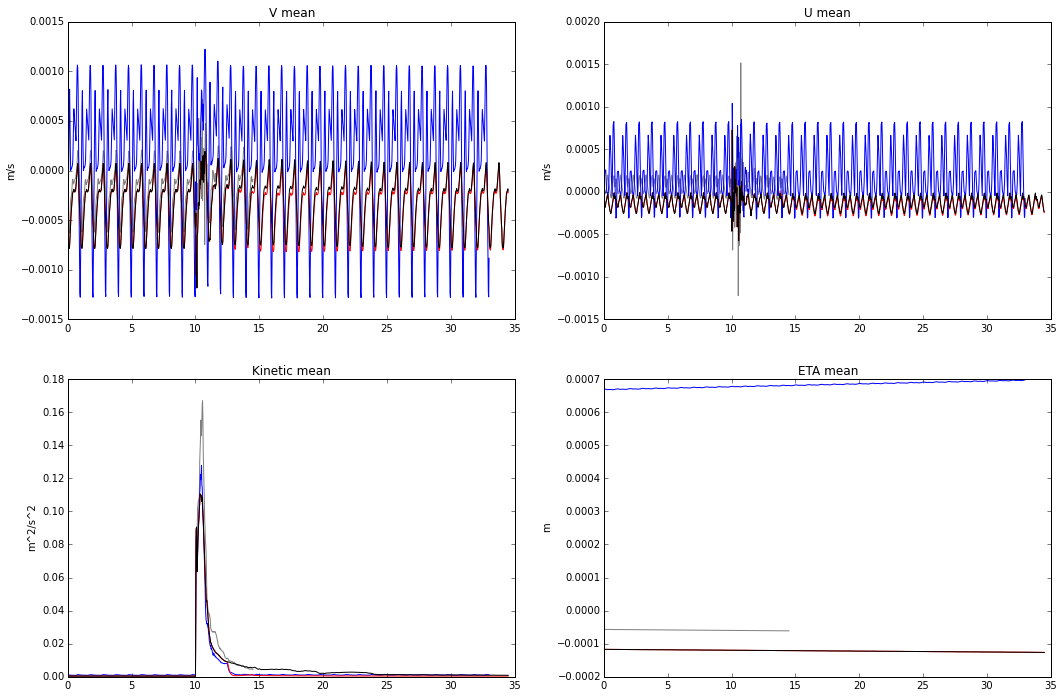

In [11]:
plot_monitor(monitor_list,['vvel_mean','uvel_mean','ke_mean','eta_mean'])

KeyError: 'time_years_ice'

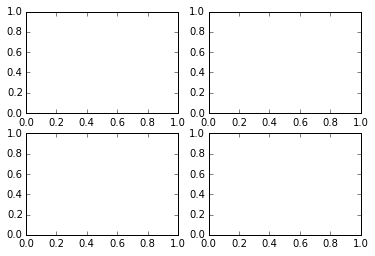

In [12]:
plot_monitor(monitor_list,['seaice_area_mean','seaice_heff_mean','seaice_heff_max','seaice_heff_min'])

In [ ]:
monitor_list = {'pert1' : pert1, 'pert2' : pert2}
plot_monitor(monitor_list,['salt_mean','sss_mean','theta_mean','sst_mean'])
plot_monitor(monitor_list,['vvel_mean','uvel_mean','ke_mean','eta_mean'])
#plot_monitor(['seaice_area_mean','seaice_heff_mean','seaice_heff_max','seaice_heff_min'],monitor_list)

In [ ]:
# free-surface_anomaly evolution
fig, axes = plt.subplots(2,1)
#axes[0].plot(run_pert0.years,run_pert0.psi_max,'blue')
#axes[0].plot(run_pert1.years,run_pert1.psi_max,'red')
axes[0].plot(run_pert2.years,run_pert2.psi_max,'green')
#axes[0].plot(run_pert0.years,run_pert0.psi_min,'blue')
#axes[0].plot(run_pert1.years,run_pert1.psi_min,'red')
axes[0].plot(run_pert2.years,run_pert2.psi_min,'green')
axes[0].set_ylabel('Sv')
axes[0].set_title('Barotropic Max/Min')

axes[1].plot(run_pert0.years,run_pert0.psi_mean,'blue')
axes[1].plot(run_pert1.years,run_pert1.psi_mean,'red')
axes[1].plot(run_pert2.years,run_pert2.psi_mean,'green')
axes[1].set_ylabel('Sv')
axes[1].set_title('Barotropic Mean')

fig.subplots_adjust(right=2.4,top=2.4)


In [ ]:
#plot_field(np.nanmean(run_pert0.data['T'][:,0:5,:,:],axis=1),run_pert0.years,0,20,matplotlib.cm.jet,'grey','C')
#plot_field(np.mean(run_pert0.data['S'][:,0:5,:,:],axis=1),run_pert0.years,25,37,matplotlib.cm.winter,'black','psu')
#plot_field(run_pert0.psi,run_pert0.years,-200,200,matplotlib.cm.seismic,'black','Sv')
#plot_field(np.nanmean(run_pert1.data['T'][:,0:5,:,:],axis=1),run_pert1.years,0,20,matplotlib.cm.jet,'grey','C')
#plot_field(np.mean(run_pert1.data['S'][:,0:5,:,:],axis=1),run_pert1.years,25,37,matplotlib.cm.winter,'black','psu')
#plot_field(run_pert0.psi,run_pert1.years,-200,200,matplotlib.cm.seismic,'black','Sv')
#plot_field(np.nanmean(run_pert2.data['T'][:,0:5,:,:],axis=1),run_pert2.years,0,20,matplotlib.cm.jet,'grey','C')
#plot_field(np.mean(run_pert2.data['S'][:,0:5,:,:],axis=1),run_pert2.years,25,37,matplotlib.cm.winter,'black','psu')
#plot_field(run_pert0.psi,run_pert2.years,-200,200,matplotlib.cm.seismic,'black','Sv')

In [14]:
file2read1 = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
Z = file2read1.variables['Zp1']
Z = Z[0:50]*1
hfacc = file2read1.variables['HFacC']
hfacc = hfacc[:]*1
monitor_list = {'pert2' : pert2,'pert18' : pert_18km}

monitor_list['pert2'].dataDyn['salt_lv_mean'].shape
vimins = {'salt_lv_mean': 32 , 'theta_lv_mean' : 0,'salt_lv_max': 32 ,'theta_lv_max': 0, 'theta_lv_min':-3 }
vimaxs = {'salt_lv_mean': 37 , 'theta_lv_mean' : 8, 'salt_lv_max': 70 ,'theta_lv_max': 20 , 'theta_lv_min':3}

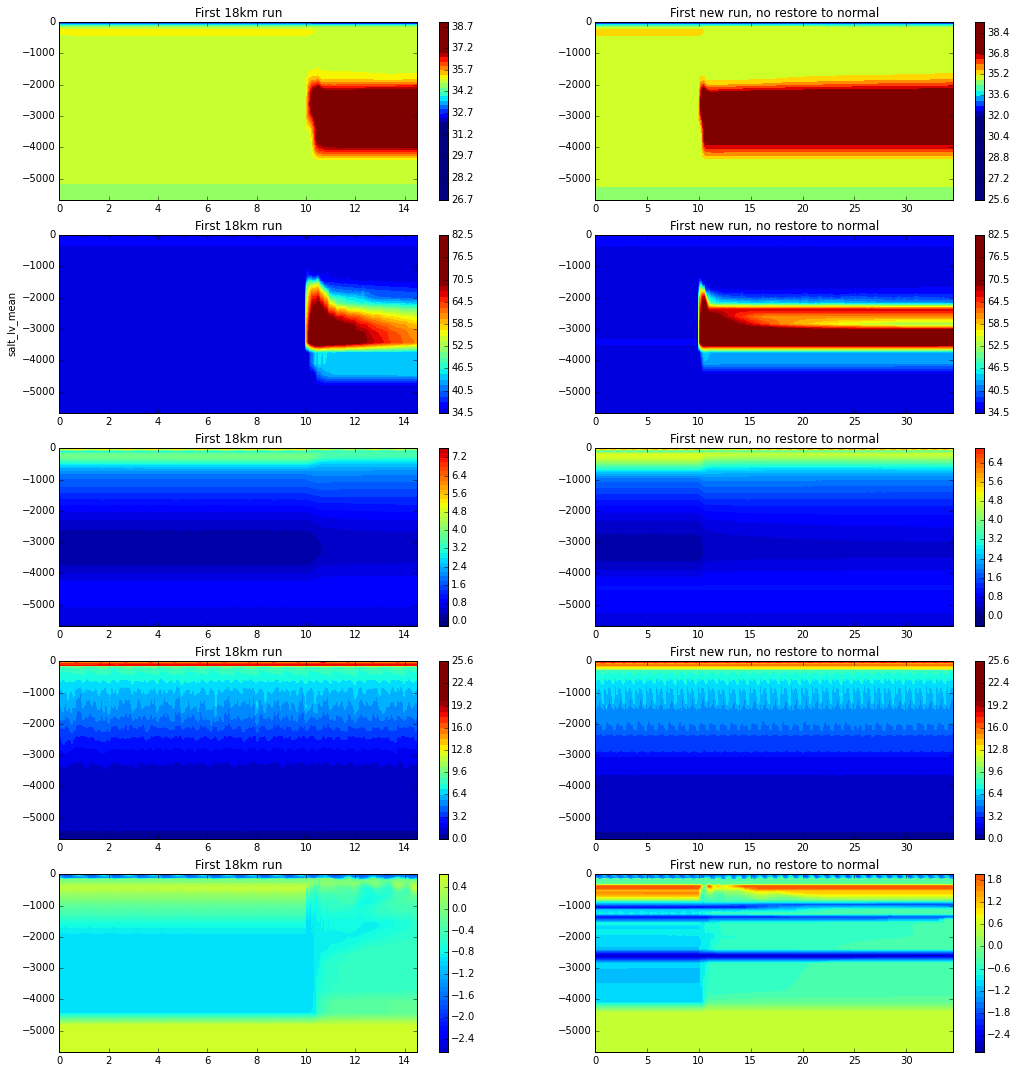

In [15]:
# free-surface_anomaly evolution
def plot_dynmon(monitor_list,var_list):
    file2read1 = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    Z = file2read1.variables['Zp1']
    Z = Z[0:50]*1
    fig, axes = plt.subplots(5,2)
    ax_ind = 0
    for var in var_list:  
        for mon in monitor_list:
            ca = axes.flat[ax_ind].contourf(monitor_list[mon].dataDyn['time_lv_years'],Z,monitor_list[mon].dataDyn[var].T,40,vmin=vimins[var],vmax=vimaxs[var])
            axes.flat[ax_ind].set_title(monitor_list[mon].title)
            cbar = fig.colorbar(ca , ax=axes.flat[ax_ind],boundaries=[1,1])
            #cbar.set_clim(vimins[var],vimaxs[var])
            ax_ind += 1
        if ((ax_ind//3) == 0):
            axes.flat[ax_ind].set_ylabel(var)
            
            
    fig.subplots_adjust(right=2.4,top=3.7)
plot_dynmon(monitor_list,['salt_lv_mean','salt_lv_max','theta_lv_mean','theta_lv_max','theta_lv_min'])

In [41]:
time_new = [91,95,99,107,120,140]
print run_pert2.years[time_new]

time_new18 = [73,77,80,86,98,116]
print run_pert18.years[time_new18]

[ 10.05555556  10.5         10.88888889  11.77777778  13.22222222
  15.44444444]
[ 10.00001929  10.50001929  10.88888889  11.72222222  13.38888889
  15.83333333]


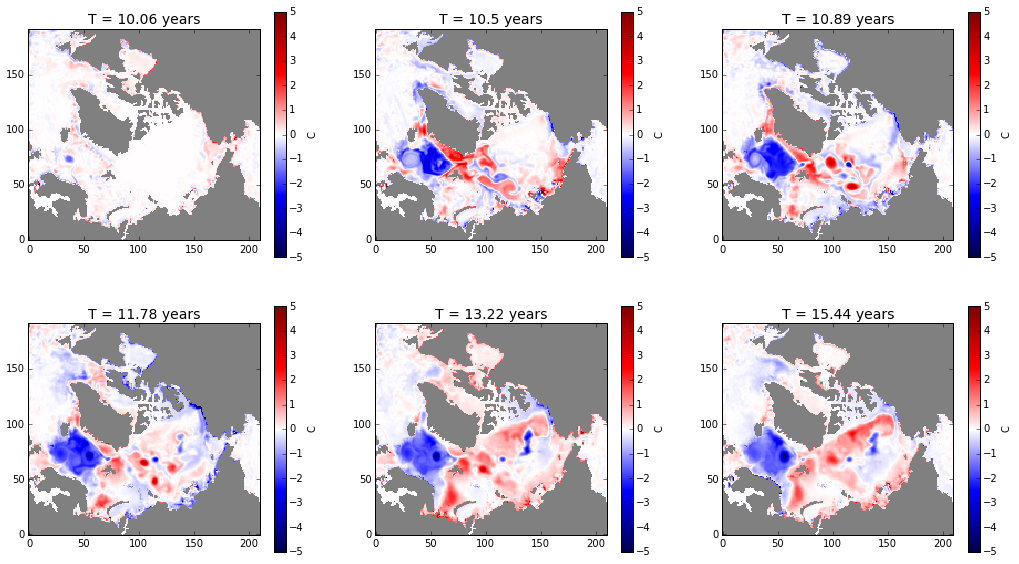

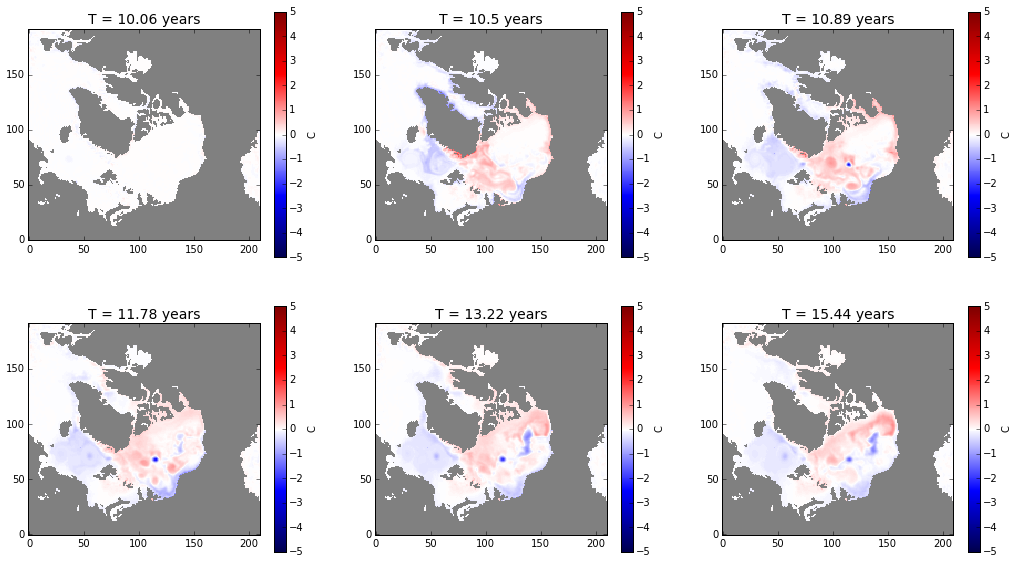

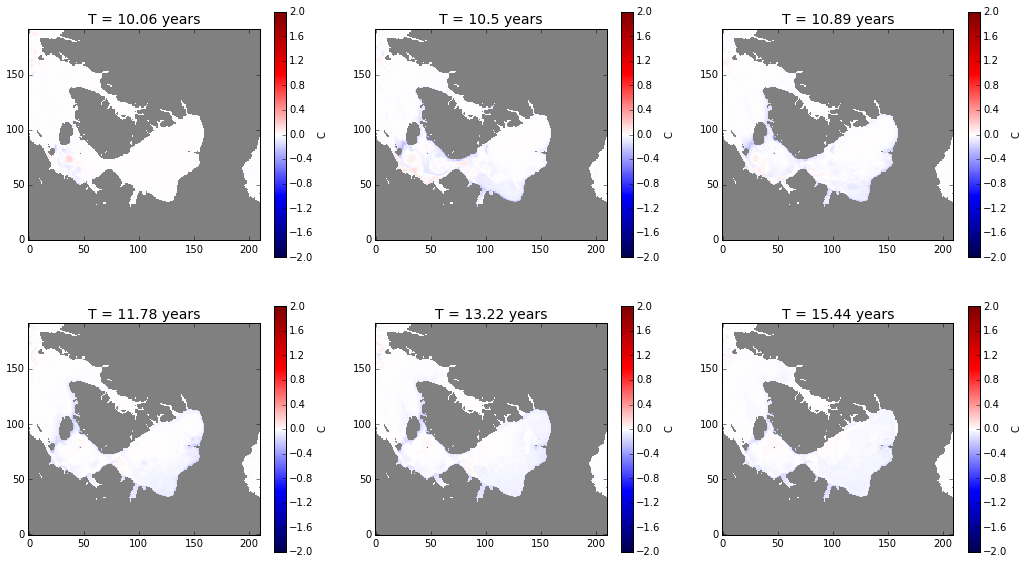

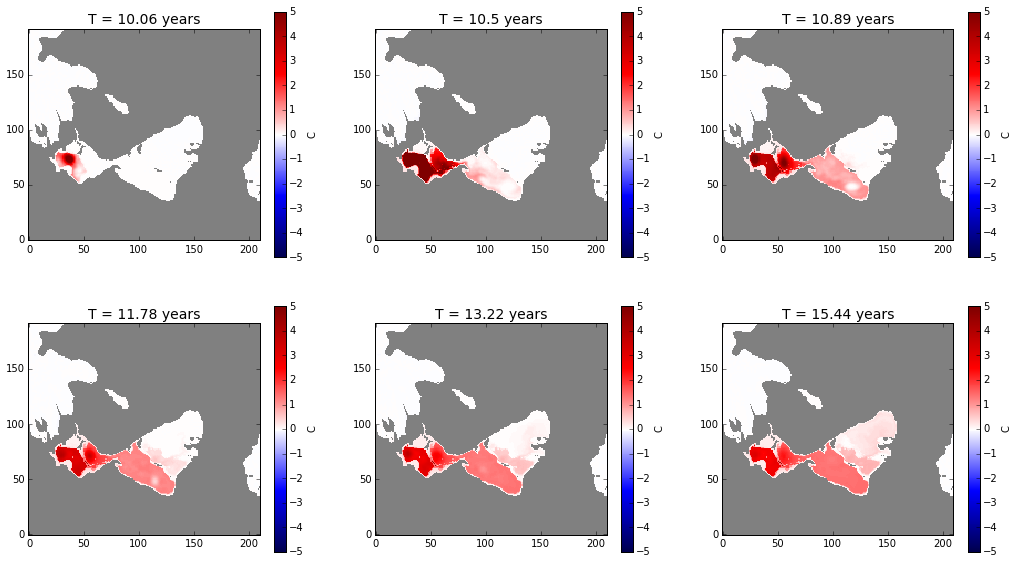

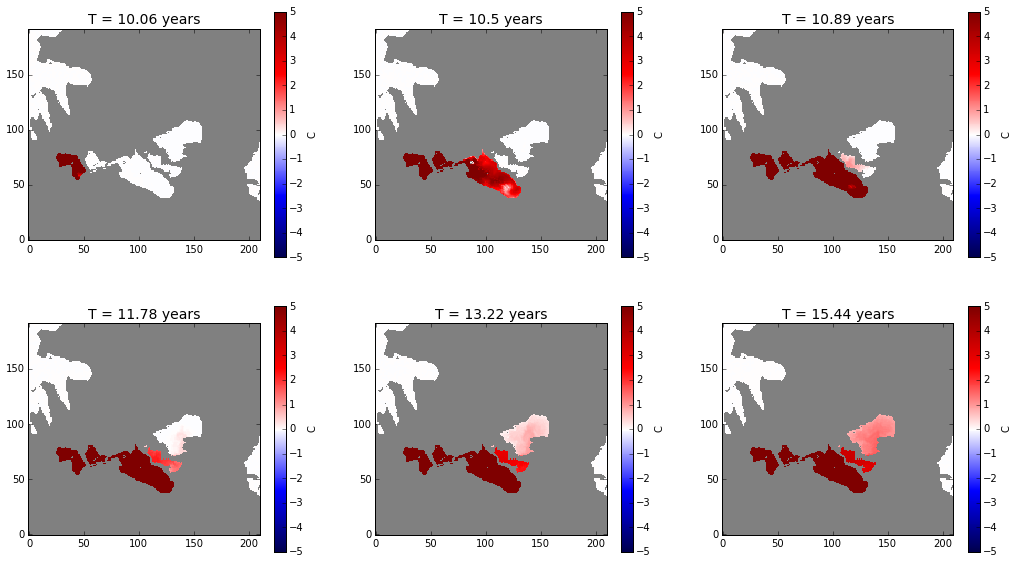

In [18]:
plot_field(np.nanmean(run_pert2.data['S'][time_new,0:10,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['S'][0:70,0:10,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert2.data['S'][time_new,10:20,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['S'][0:70,10:20,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert2.data['S'][time_new,20:30,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['S'][0:70,20:30,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-2,2,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert2.data['S'][time_new,30:40,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['S'][0:70,30:40,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert2.data['S'][time_new,40:50,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['S'][0:70,40:50,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-5,5,matplotlib.cm.seismic,'grey','C')

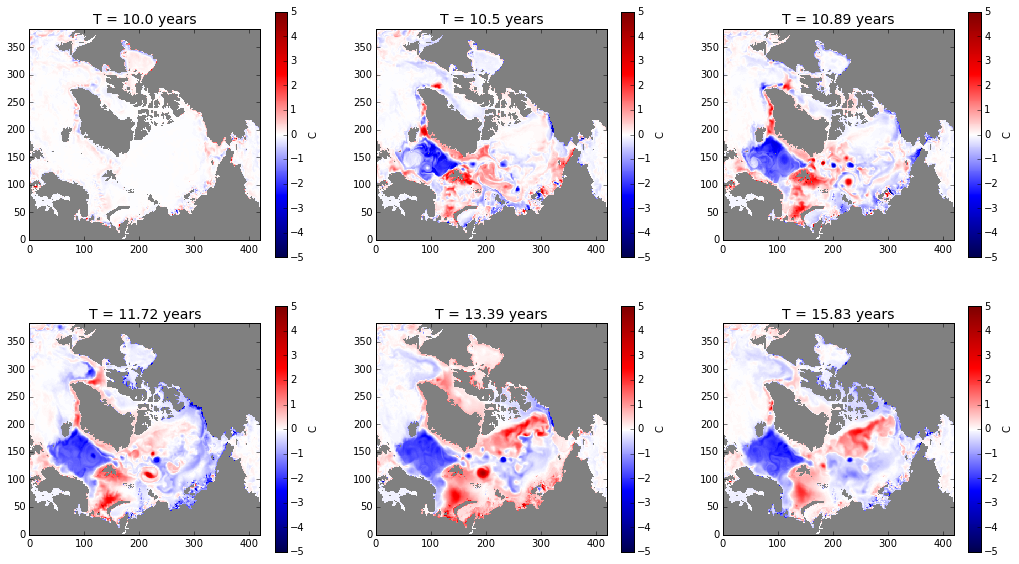

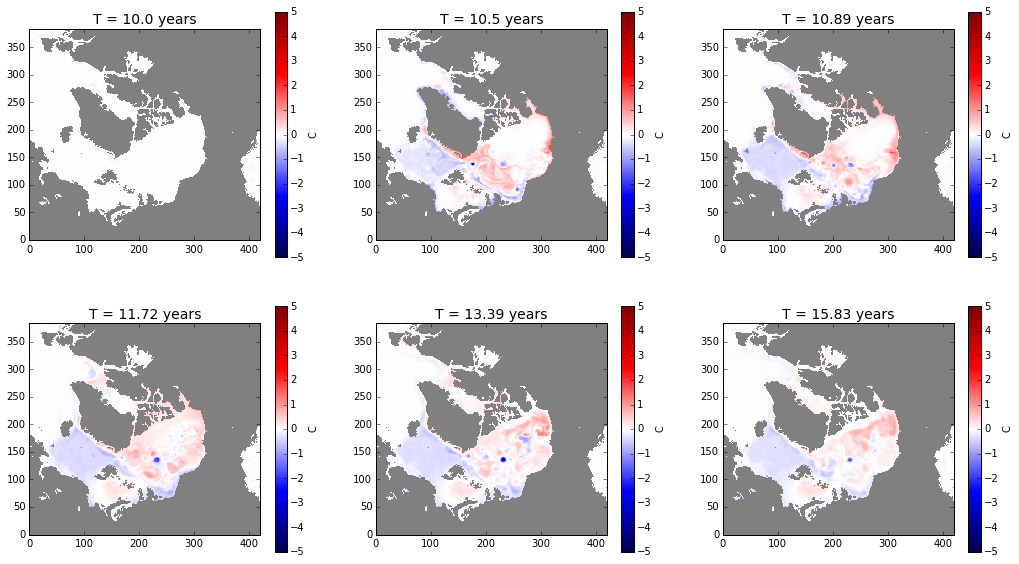

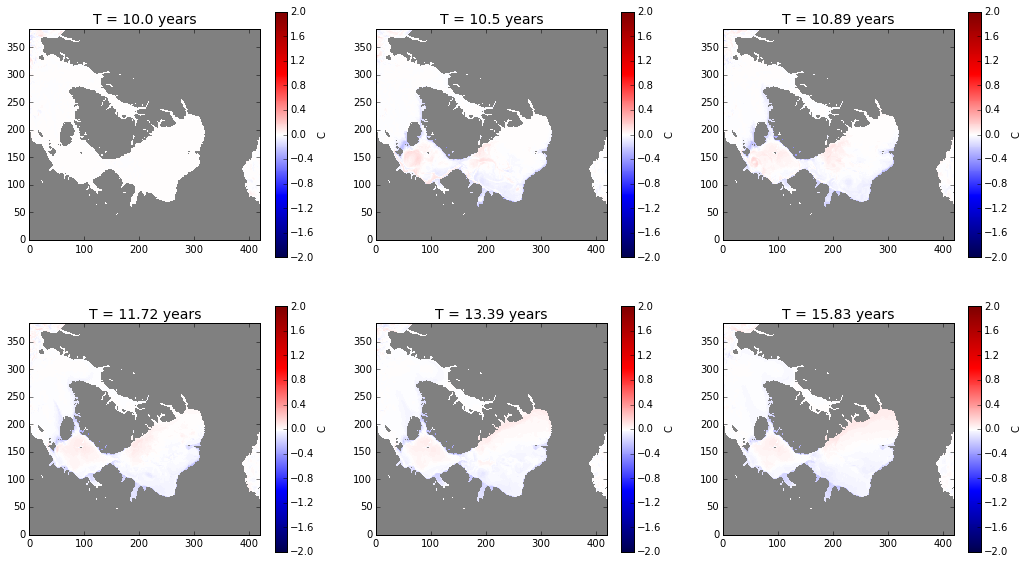

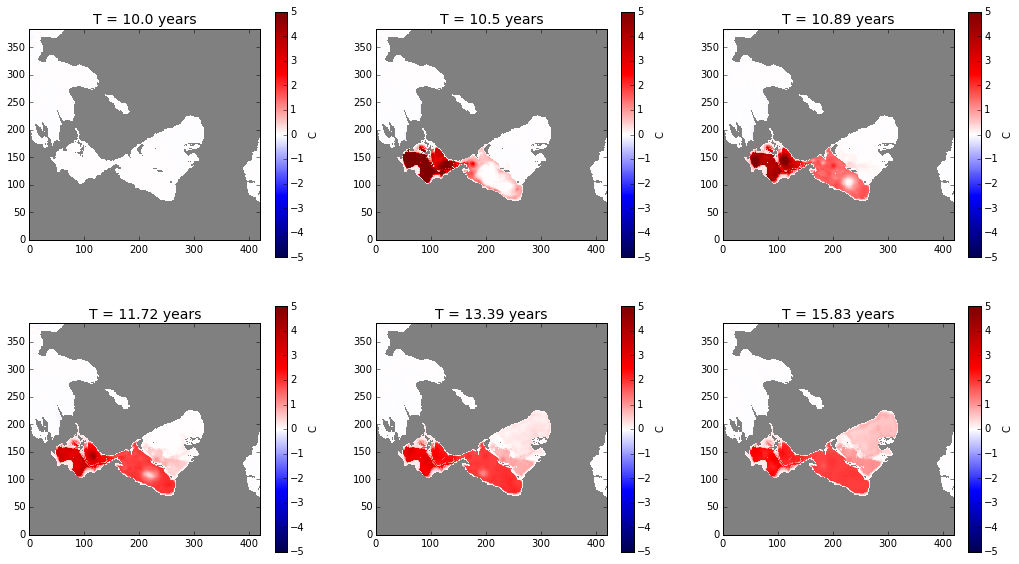

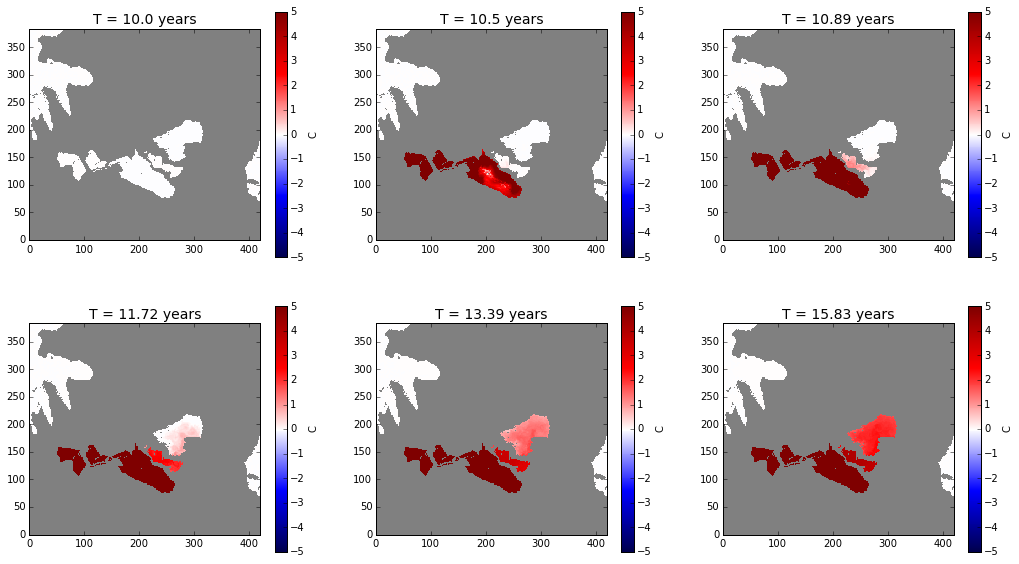

In [42]:
plot_field(np.nanmean(run_pert18.data['S'][time_new18,0:10,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['S'][0:70,0:10,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert18.data['S'][time_new18,10:20,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['S'][0:70,10:20,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert18.data['S'][time_new18,20:30,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['S'][0:70,20:30,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-2,2,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert18.data['S'][time_new18,30:40,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['S'][0:70,30:40,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert18.data['S'][time_new18,40:50,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['S'][0:70,40:50,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-5,5,matplotlib.cm.seismic,'grey','C')

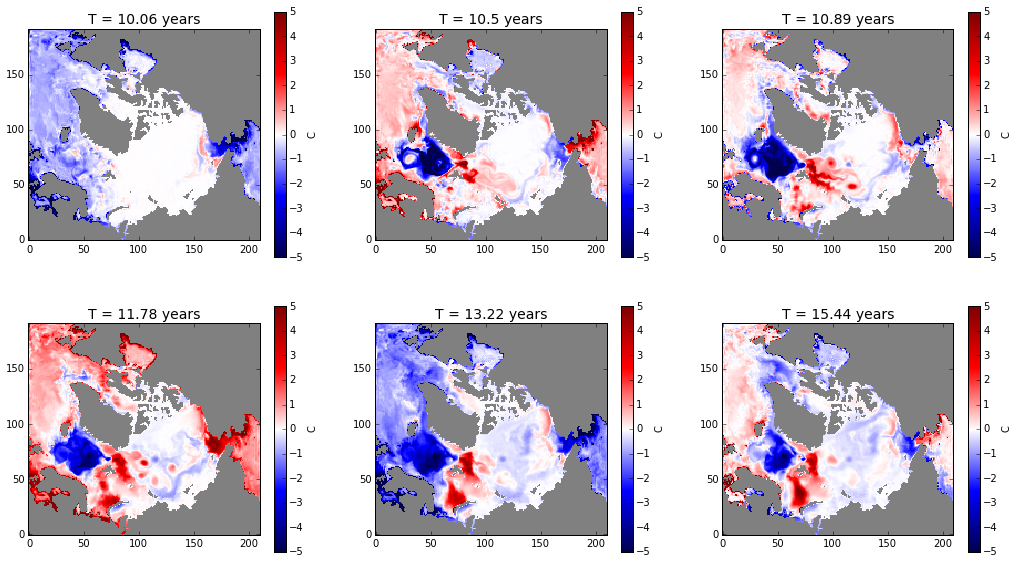

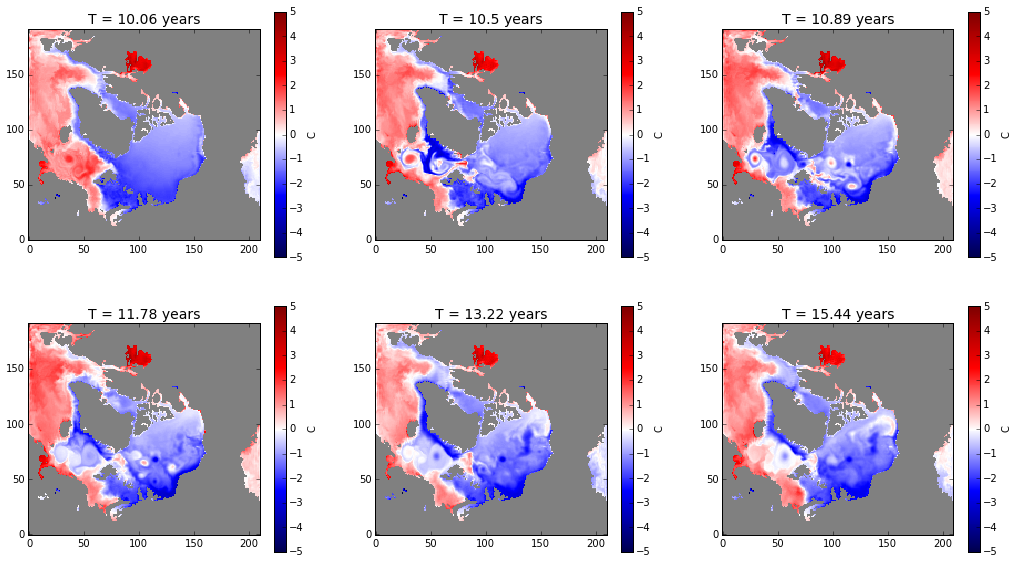

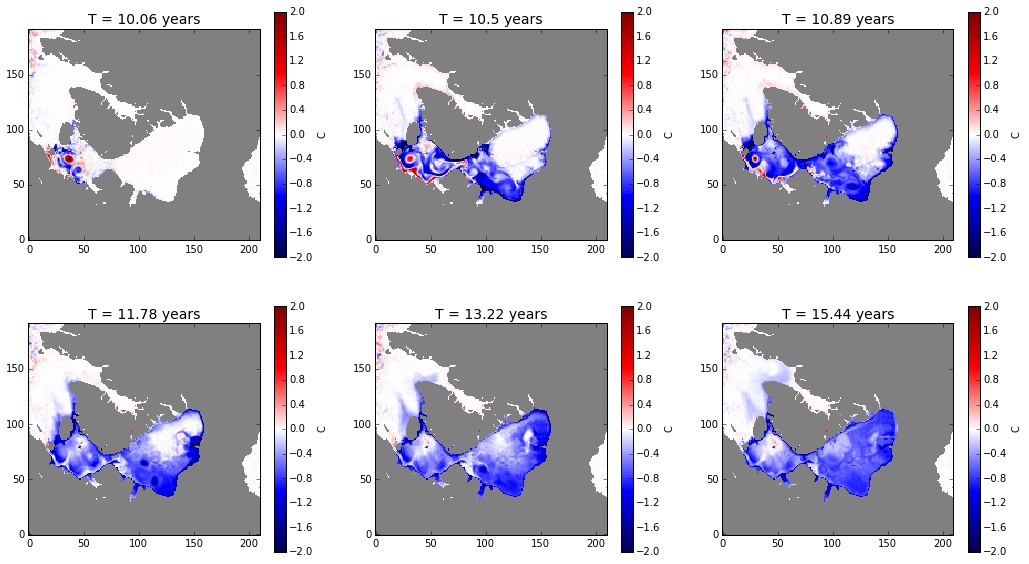

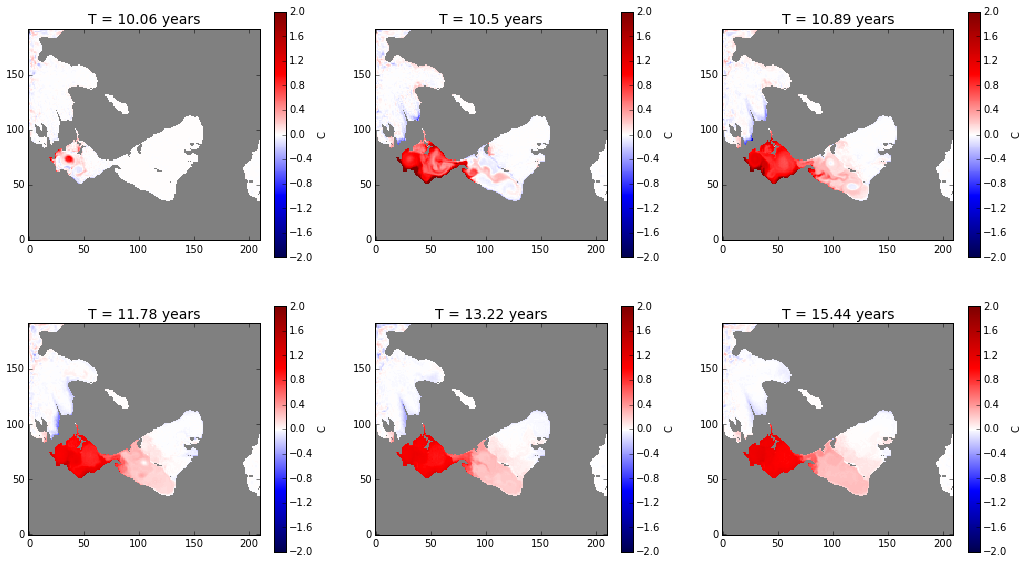

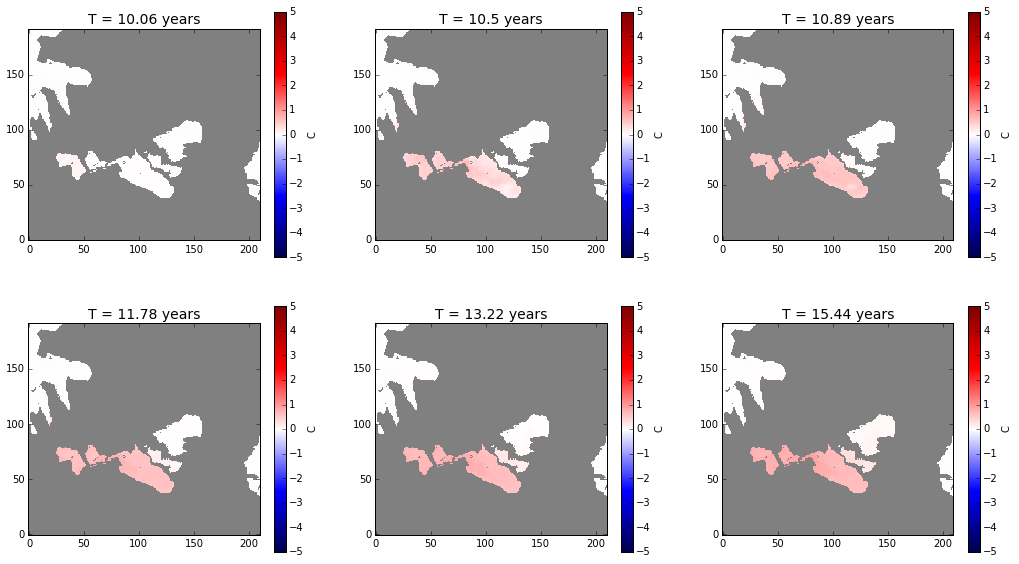

In [43]:
plot_field(np.nanmean(run_pert2.data['T'][time_new,0:10,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['T'][0:70,0:10,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert2.data['T'][time_new,1:20,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['T'][0:70,10:20,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert2.data['T'][time_new,20:30,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['T'][0:70,20:30,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-2,2,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert2.data['T'][time_new,30:40,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['T'][0:70,30:40,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-2,2,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert2.data['T'][time_new,40:50,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert2.data['T'][0:70,40:50,:,:],axis=1),axis=0),\
           run_pert2.years[time_new],-5,5,matplotlib.cm.seismic,'grey','C')

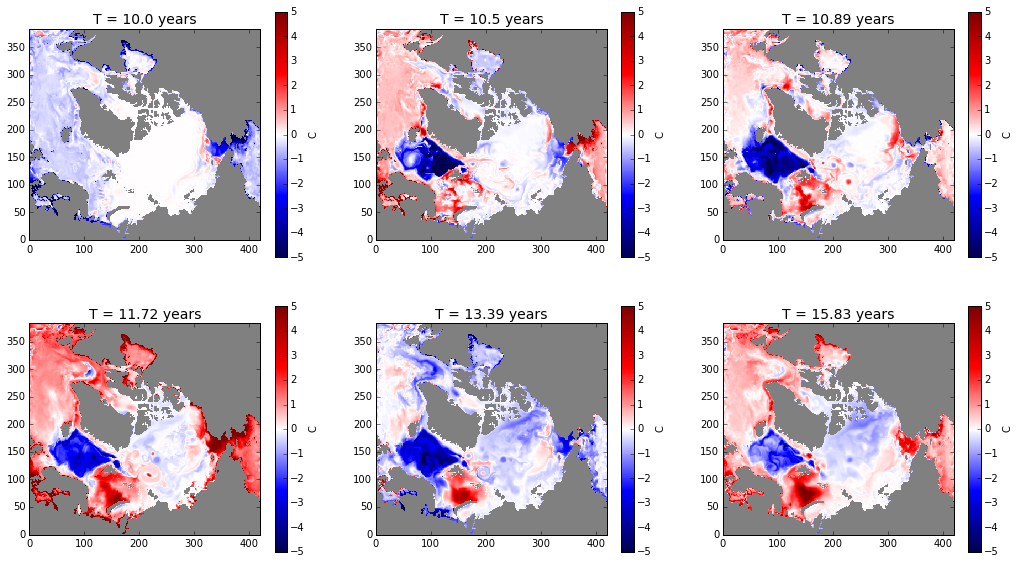

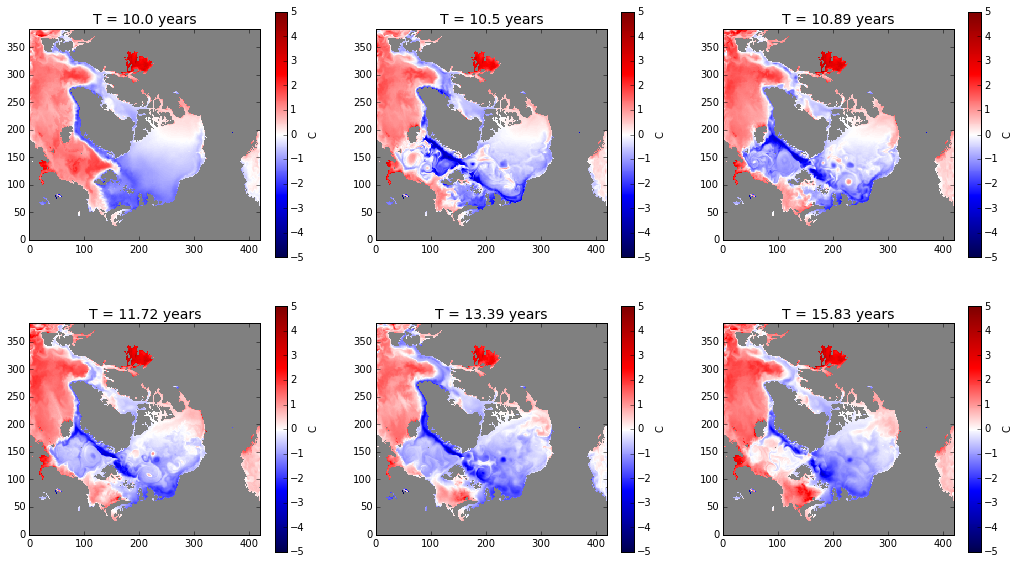

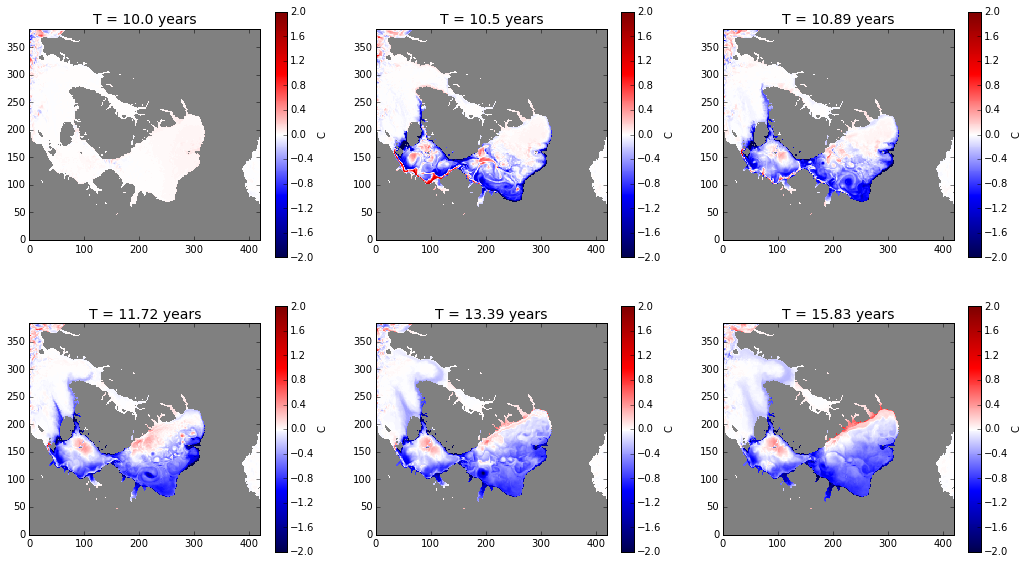

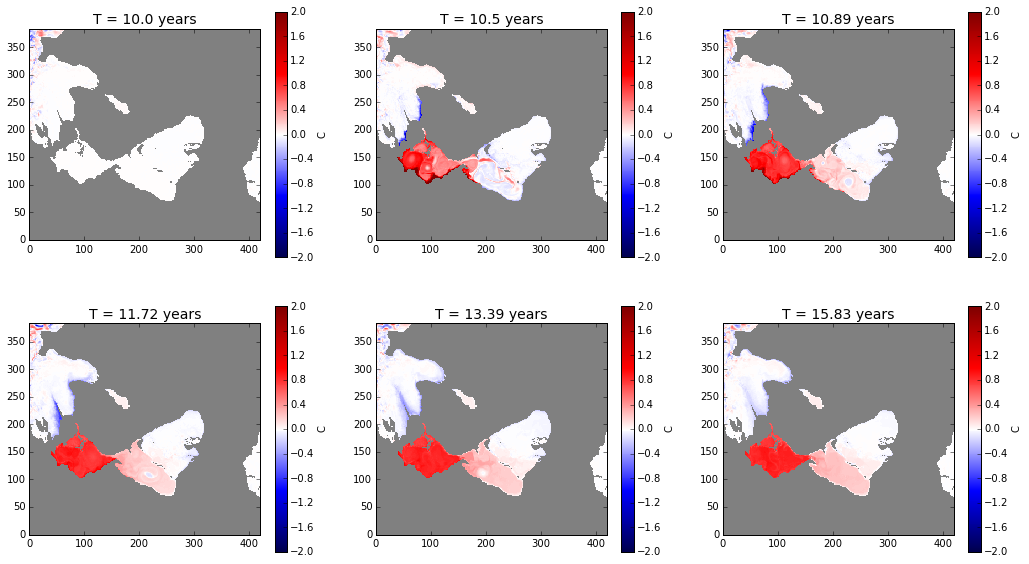

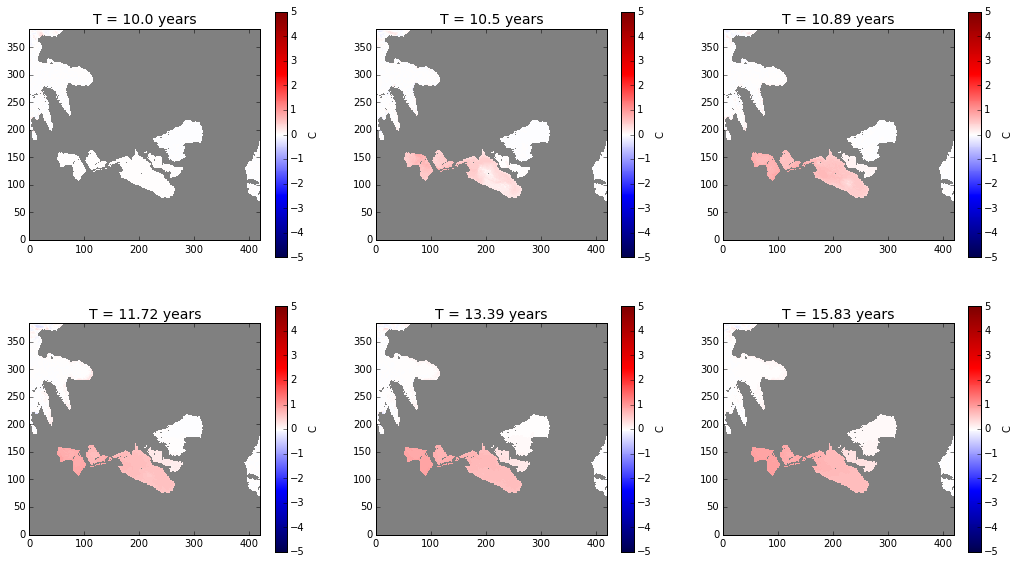

In [45]:
plot_field(np.nanmean(run_pert18.data['T'][time_new18,0:10,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['T'][0:70,0:10,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert18.data['T'][time_new18,1:20,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['T'][0:70,10:20,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-5,5,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert18.data['T'][time_new18,20:30,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['T'][0:70,20:30,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-2,2,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert18.data['T'][time_new18,30:40,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['T'][0:70,30:40,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-2,2,matplotlib.cm.seismic,'grey','C')

plot_field(np.nanmean(run_pert18.data['T'][time_new18,40:50,:,:],axis=1)\
           -np.nanmean(np.nanmean(run_pert18.data['T'][0:70,40:50,:,:],axis=1),axis=0),\
           run_pert18.years[time_new18],-5,5,matplotlib.cm.seismic,'grey','C')

In [46]:
plot_field(run_pert2.data['S'][time_new,:,58:80,76],run_pert2.years[time_new],25,37,matplotlib.cm.Accent,'black','psu','upper')
plot_field(run_pert2.data['V'][time_new,:,58:80,76],run_pert2.years[time_new],-1,1,matplotlib.cm.seismic,'black','m/s','upper')
plot_field(run_pert2.data['T'][time_new,:,58:80,76],run_pert2.years[time_new],-1,7,matplotlib.cm.spectral,'black','C','upper')

TypeError: an integer is required

In [ ]:
aa = np.concatenate((run_pert2.data['V'][time_new,:,40,53:68],run_pert2.data['U'][time_new,:,40:58,68]),axis=2)
plot_field(aa,run_pert2.years[time_new],-0.3,0.3,matplotlib.cm.seismic,'black','m/s','upper')

aa = np.concatenate((run_pert2.data['S'][time_new,:,40,53:68],run_pert2.data['S'][time_new,:,40:58,68]),axis=2)
plot_field(aa,run_pert2.years[time_new],25,37,matplotlib.cm.Accent,'black','psu','upper')

aa = np.concatenate((run_pert2.data['T'][time_new,:,40,53:68],run_pert2.data['T'][time_new,:,40:58,68]),axis=2)
plot_field(aa,run_pert2.years[time_new],-1,12,matplotlib.cm.spectral,'black','C','upper')

run_pert2 FluxSum
run_pert18 FluxSum
run_pert2 FluxSumT
run_pert18 FluxSumT
run_pert2 FluxSumS
run_pert18 FluxSumS
First integration: blue
New integration with restore to normal: red
New integration withouth restore to normal: green


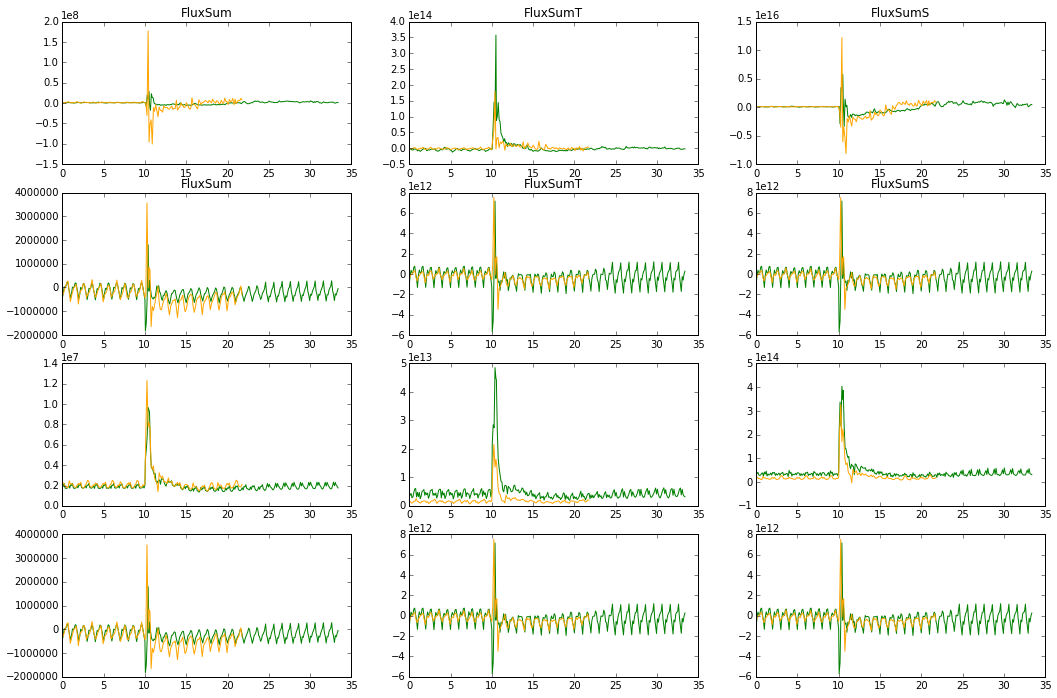

In [47]:
#monitor = {'run_pert0' : run_pert0 , 'run_pert1' : run_pert1 , 'run_pert2' : run_pert2}
monitor = {'run_pert2' : run_pert2 , 'run_pert18' : run_pert18}
variables = {'FluxSum' : 'FluxSum' , 'FluxSumS' : 'FluxSumS' , 'FluxSumT' : 'FluxSumT' }
colors = {'run_pert0': 'blue' , 'run_pert1' : 'red' , 'run_pert2' : 'green' , 'run_pert18' : 'orange'}

# free-surface_anomaly evolution
def plot_flux(var_list,monitor_list,location):
    fig, axes = plt.subplots(4,3)
    ax_ind = 0
    for var in var_list:  
        for mon in monitor_list:
            print mon,var
            axes.flat[ax_ind].plot(monitor_list[mon].years,monitor_list[mon].Fram[var],colors[mon])
            axes.flat[ax_ind+3].plot(monitor_list[mon].years,monitor_list[mon].Barents[var],colors[mon])
            axes.flat[ax_ind+6].plot(monitor_list[mon].years,monitor_list[mon].Denmark[var],colors[mon])
            axes.flat[ax_ind+9].plot(monitor_list[mon].years,monitor_list[mon].Norwice[var],colors[mon])
        axes.flat[ax_ind].set_title(var)
        axes.flat[ax_ind+3].set_title(var)
        ax_ind += 1        
    fig.subplots_adjust(right=2.4,top=2.4)

plot_flux(variables,monitor,'Fram')
print 'First integration: blue'
print 'New integration with restore to normal: red'
print 'New integration withouth restore to normal: green'

run_pert2 FluxTop


ValueError: x and y must have same first dimension

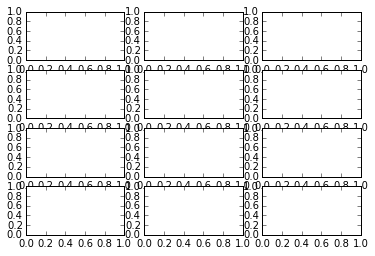

In [91]:
def plot_flux(var_list,monitor_list,location):
    fig, axes = plt.subplots(4,3)
    ax_ind = 0
    for var in var_list:  
        for mon in monitor_list:
            print mon,var
            axes.flat[ax_ind].plot(monitor_list[mon].years,monitor_list[mon].Fram[var],colors[mon])
            #axes.flat[ax_ind+3].plot(monitor_list[mon].years,monitor_list[mon].Barents[var],colors[mon])
            #axes.flat[ax_ind+6].plot(monitor_list[mon].years,monitor_list[mon].Denmark[var],colors[mon])
            #axes.flat[ax_ind+9].plot(monitor_list[mon].years,monitor_list[mon].Norwice[var],colors[mon])
        axes.flat[ax_ind].set_title(var)
        axes.flat[ax_ind+3].set_title(var)
        ax_ind += 1        
    fig.subplots_adjust(right=2.4,top=2.4)

monitor = {'run_pert18' : run_pert18 , 'run_pert2' : run_pert2}
#monitor = {'run_pert1' : run_pert1 , 'run_pert2' : run_pert2}
variables = {'FluxSum' : 'FluxSum' , 'FluxSumS' : 'FluxSumS' , 'FluxSumT' : 'FluxSumT' }
pos = {'FluxTop':'FluxTop' , 'FluxMid':'FluxMid' , 'FluxBot':'FluxBot' ,\
          'FluxTopS':'FluxTopS' , 'FluxMidS':'FluxMidS' , 'FluxBotS':'FluxBotS',\
          'FluxTopT':'FluxTopT' , 'FluxMidT':'FluxMidT' , 'FluxBotT':'FluxBotT'}
pos1 = ['FluxTop','FluxMid','FluxBot','FluxTopS','FluxMidS','FluxBotS','FluxTopT','FluxMidT','FluxBotT']

plot_flux(pos1,monitor,'Fram')
print 'First integration: blue'
print 'New integration with restore to normal: red'
print 'New integration withouth restore to normal: green'

In [49]:
variables = {'Flux' : 'Flux' , 'FluxS' : 'FluxS' , 'FluxT' : 'FluxT' }
monitor = {'run_pert2' : run_pert2, 'run_pert18' : run_pert18}
col = {'run_pert2' : 'green' , 'run_pert18' : 'orange'}



run_pert2 Flux
run_pert18 Flux
run_pert2 FluxT
run_pert18 FluxT
run_pert2 FluxS
run_pert18 FluxS


/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in greater
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: invalid value encountered in less


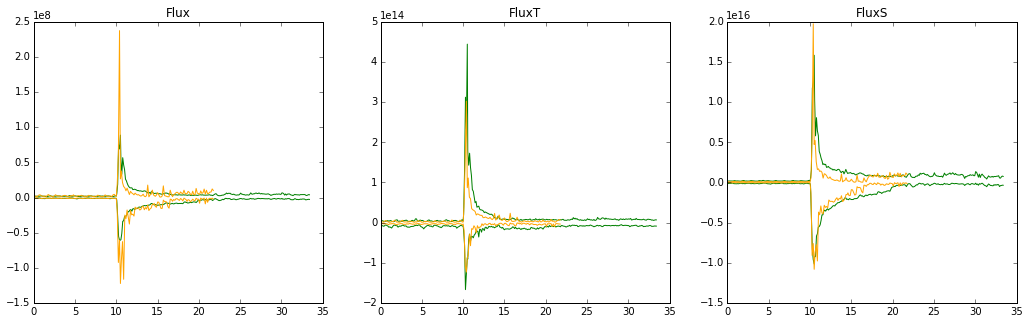

In [50]:
def plot_positive_flux(var_list,monitor_list):
    fig, axes = plt.subplots(1,3)
    ax_ind = 0
    for var in var_list:  
        for mon in monitor_list:
            print mon,var
            positive2 = np.zeros_like(monitor_list[mon].Fram[var])
            positive2[monitor_list[mon].Fram[var]>0] = monitor_list[mon].Fram[var][monitor_list[mon].Fram[var]>0]
            negative2 = np.zeros_like(monitor_list[mon].Fram[var])
            negative2[monitor_list[mon].Fram[var]<0] = monitor_list[mon].Fram[var][monitor_list[mon].Fram[var]<0]
            positive2 = np.nansum(np.nansum(positive2,axis=2),axis=1)
            negative2 = np.nansum(np.nansum(negative2,axis=2),axis=1)
            axes.flat[ax_ind].plot(monitor_list[mon].years,positive2,col[mon])
            axes.flat[ax_ind].plot(monitor_list[mon].years,negative2,col[mon])
        axes.flat[ax_ind].set_title(var)
        ax_ind += 1        
    fig.subplots_adjust(right=2.4,top=1.1)
plot_positive_flux(variables,monitor)

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater


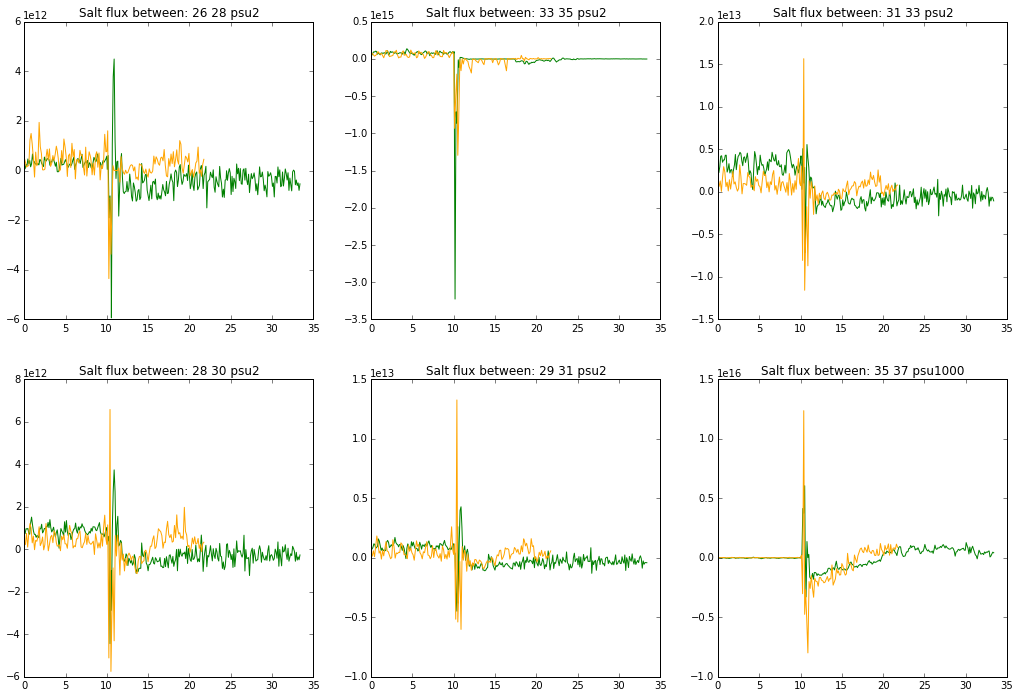

In [51]:
def plot_salinity_class(m_list):
    salt = { '26':26 , '28':28 , '29':29 , '31':31, '33':33, '35':35}

    sal_lv = {'25':[] , '26':[] , '27':[] , '28':[] , '29':[] , '30':[], '31':[], '32':[], '33':[], \
                  '34':[], '35':[], '36':[]}

    fig, axes = plt.subplots(nrows=2, ncols=3)
    ax_ind = 0 
    for sa in salt:
        for mon in m_list:
            if sa == '35':
                ii = 1000
            else:
                ii = 2
            aa = np.zeros_like(m_list[mon].Fram['FluxS'])
            if m_list[mon].res == 36:
                kk = 1
            else:
                kk = 2 
            aa[m_list[mon].data['S'][:,:,58*kk:80*kk,76*kk]>salt[sa]] = m_list[mon].Fram['FluxS'][(m_list[mon].data['S'][:,:,58*kk:80*kk,76*kk]>salt[sa])]
            aa[m_list[mon].data['S'][:,:,58*kk:80*kk,76*kk]>salt[sa]+ii] = 0
            sal_lv[sa] = np.nansum(np.nansum(aa,axis=2),axis=1)
            axes.flat[ax_ind].plot(m_list[mon].years,sal_lv[sa],col[mon])
            axes.flat[ax_ind].set_title('Salt flux between: '+str(salt[sa])+' '+str(salt[sa]+2)+' psu'+str(ii))
        ax_ind += 1
    fig.subplots_adjust(right=2.4,top=2.4)
    
plot_salinity_class(monitor)

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: invalid value encountered in greater
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater


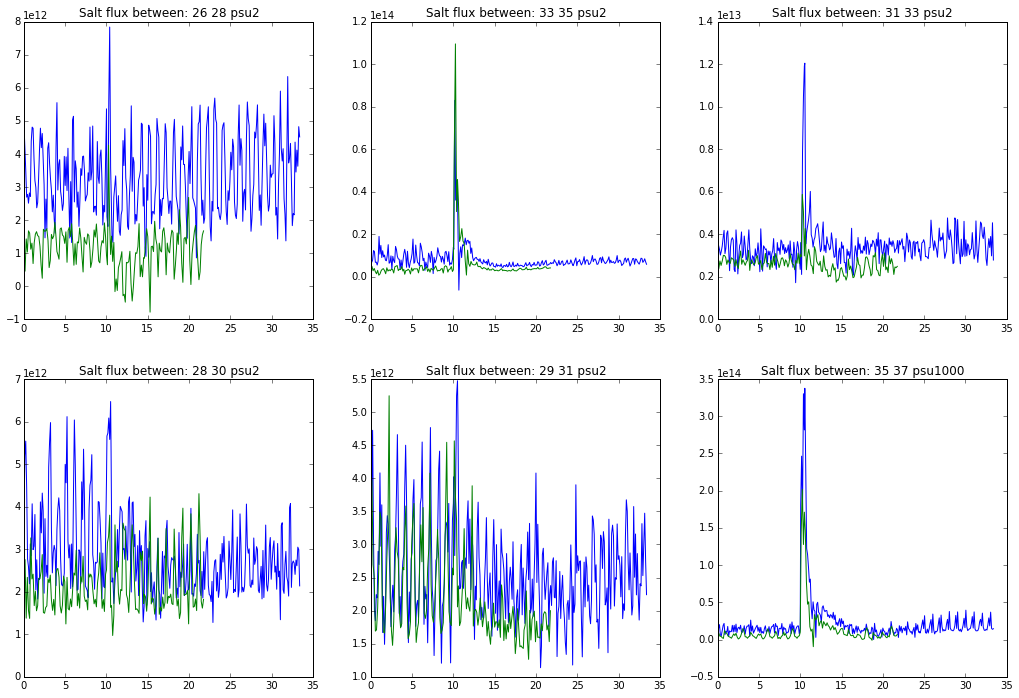

In [52]:
def plot_salinity_class(m_list):
    salt = { '26':26 , '28':28 , '29':29 , '31':31, '33':33, '35':35}

    sal_lv = {'25':[] , '26':[] , '27':[] , '28':[] , '29':[] , '30':[], '31':[], '32':[], '33':[], \
                  '34':[], '35':[], '36':[]}

    fig, axes = plt.subplots(nrows=2, ncols=3)
    ax_ind = 0 
    for sa in salt:
        for mon in m_list:
            if sa == '35':
                ii = 1000
            else:
                ii = 2
            aa = np.zeros_like(m_list[mon].Fram['FluxS'])
            if m_list[mon].res == 36:
                kk = 1
            else:
                kk = 2 
            aa[m_list[mon].data['S'][:,:,100*kk,37*kk:48*kk]>salt[sa]] = m_list[mon].Denmark['FluxS'][(m_list[mon].data['S'][:,:,100*kk,37*kk:48*kk]>salt[sa])]
            aa[m_list[mon].data['S'][:,:,100*kk,37*kk:48*kk]>salt[sa]+ii] = 0
            sal_lv[sa] = np.nansum(np.nansum(aa,axis=2),axis=1)
            axes.flat[ax_ind].plot(m_list[mon].years,sal_lv[sa])
            axes.flat[ax_ind].set_title('Salt flux between: '+str(salt[sa])+' '+str(salt[sa]+2)+' psu'+str(ii))
        ax_ind += 1
    fig.subplots_adjust(right=2.4,top=2.4)
plot_salinity_class(monitor)

In [ ]:
run_pert2.data['T'][np.isnan(run_pert2.data['S'])]=0
plot_field_gif(np.nanmean(run_pert2.data['T'][75:150,0:5,:,:],axis=1),0,20,matplotlib.cm.jet,'grey','C','tempsurf',run_pert2.years[75:150],origin='lower')
plot_field_gif(np.nanmean(run_pert2.data['S'][75:150,0:5,:,:],axis=1),25,37,matplotlib.cm.winter,'black','psu','saltsurf',run_pert2.years[75:150],origin='lower')

In [53]:
volume = np.zeros_like(run_pert2.data['T'])
volume[:] = 1 
for i in range(volume.shape[0]):
    volume[i,:,:,:] = vol

totvol_atl = np.nanmean(np.nanmean(np.nanmean(vol[:,:,:75],axis=2),axis=1),axis=0)
totvol_arct = np.nanmean(np.nanmean(np.nanmean(vol[:,:,75:170],axis=2),axis=1),axis=0)
totvol_cuc = np.nanmean(np.nanmean(np.nanmean(vol[:,:,170:],axis=2),axis=1),axis=0)
totvol = np.nanmean(np.nanmean(np.nanmean(vol[:,:,:],axis=2),axis=1),axis=0)

NameError: name 'vol' is not defined

In [ ]:
years = T/(60*60*24*360)-T[0]/(60*60*24*360)
times_vort = [38,40,43,46,50,55]
HDiv = np.array(momHDiv)
KE = np.array(momKE)
Vort3 = np.array(momVort3)

file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
hfacc = file2read.variables['HFacC']
hfacc = hfacc[:]*1

HDiv[:,hfacc==0] = np.nan
KE[:,hfacc==0] = np.nan
Vort3[:,hfacc==0] = np.nan

In [86]:
times_vort = [13,14,15,16,17,18]
times_vort18 = [13,14,15,16,17,18]
years = run_pert2.vort['seconds']/(60*60*24*360) - 110
years18 = run_pert18.vort['seconds']/(60*60*24*360) - 91
print years[times_vort]
print years18[times_vort18]

[ 10.91666667  11.75        12.58333333  13.41666667  14.25        15.08333333]
[ 10.91666667  11.75        12.58333333  13.41666667  14.25        15.08333333]


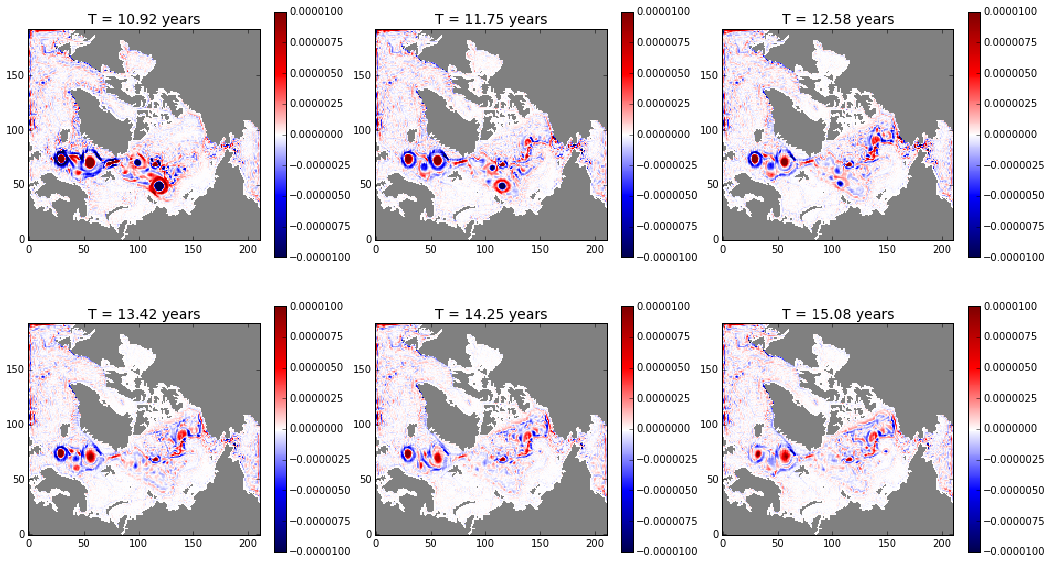

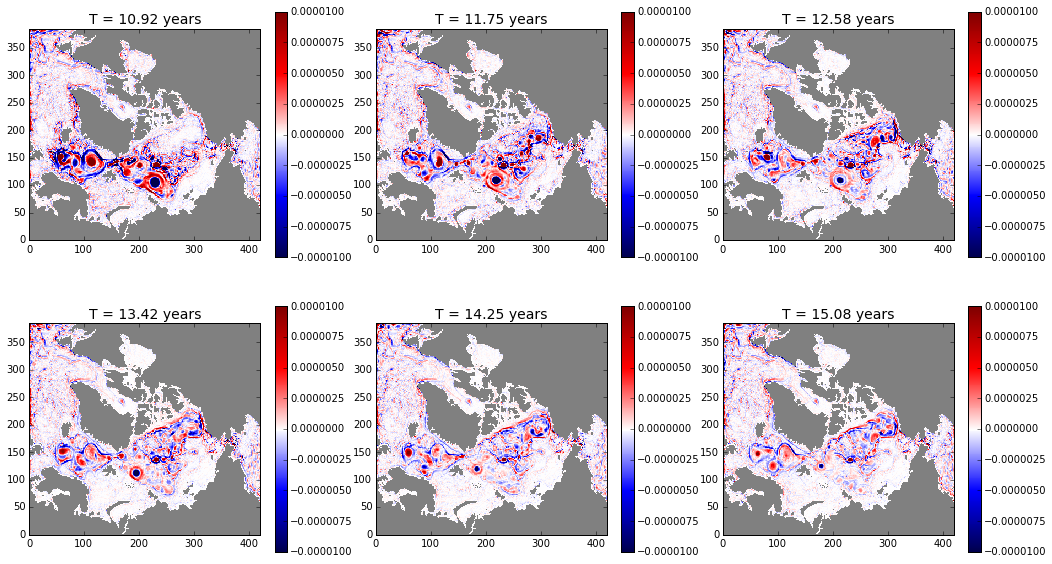

In [87]:
def plot_field1(field,years,vimin,vimax,cmap,setbad,unity,row=2,col=3):
    # This function plots a 2D field, the field is meant to have NaNs on the land place                                                
    # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar                          
    # cmap is a colomap                                                                                                                
    fig, axes = plt.subplots(nrows=row, ncols=col)
    i=0
    vimin = vimin
    vimax = vimax

    for ax in axes.flat:
        ax.set_title("T = "+str(np.round(years[i],2))+" years")
        masked_array = np.ma.array(field[i,:,:], mask=np.isnan(field[0,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="lower")
        cbar = fig.colorbar(ca , ax=ax, )
        cbar.ax.set_ylabel(unity)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)
        i=i+1
    fig.subplots_adjust(right=2.4,top=2)
plot_field1(np.nanmean(run_pert2.vort['vorticity'][times_vort,:,:,:],axis=1),years[times_vort],-0.00001,0.00001,matplotlib.cm.seismic,'grey','')
plot_field1(np.nanmean(run_pert18.vort['vorticity'][times_vort18,:,:,:],axis=1),years18[times_vort18],-0.00001,0.00001,matplotlib.cm.seismic,'grey','')

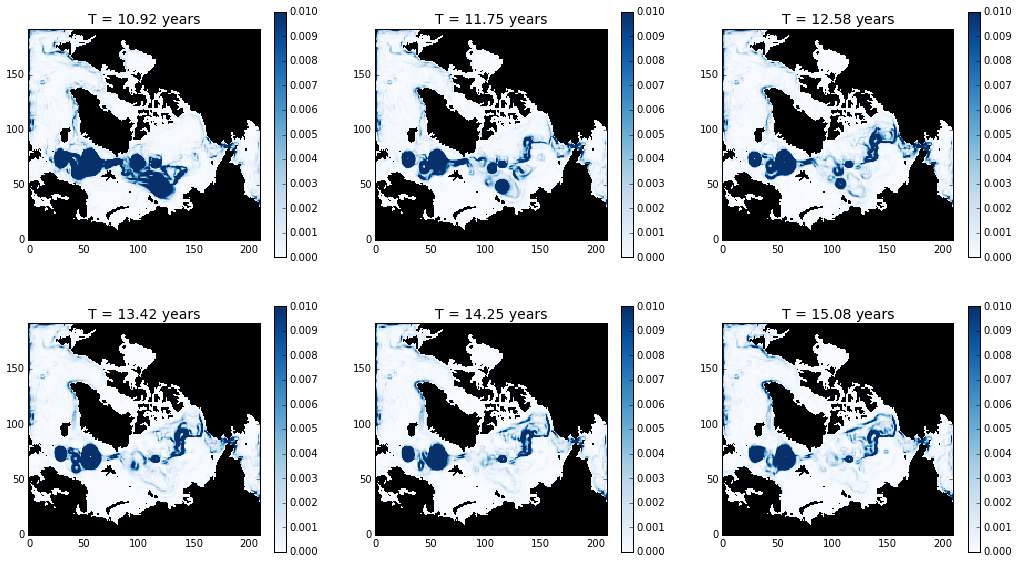

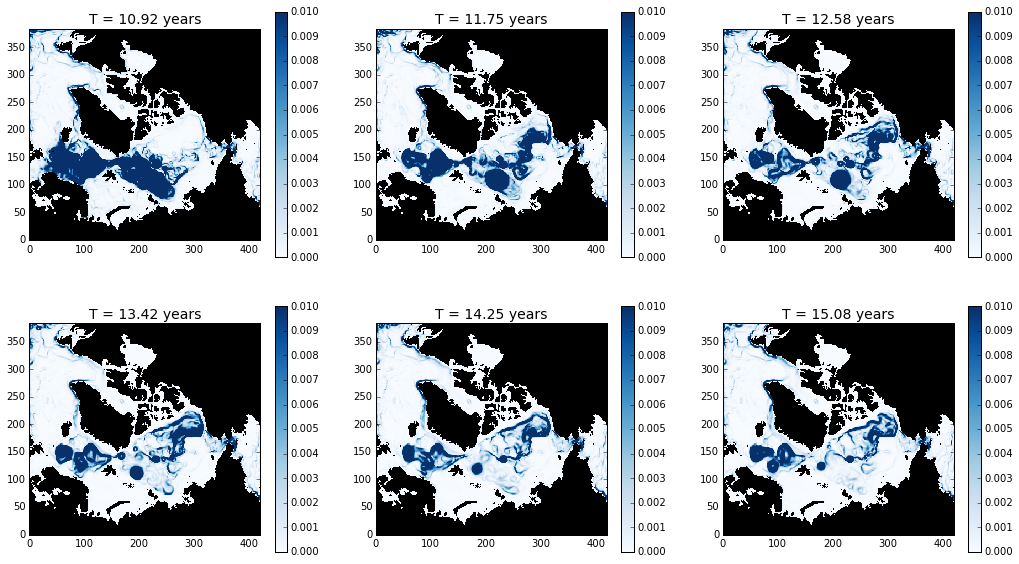

In [88]:
plot_field(np.nanmean(run_pert2.vort['KE'][times_vort,1:50,:,:],axis=1),years[times_vort],0,0.01,matplotlib.cm.Blues,'black','')
plot_field(np.nanmean(run_pert18.vort['KE'][times_vort,1:50,:,:],axis=1),years18[times_vort18],0,0.01,matplotlib.cm.Blues,'black','')

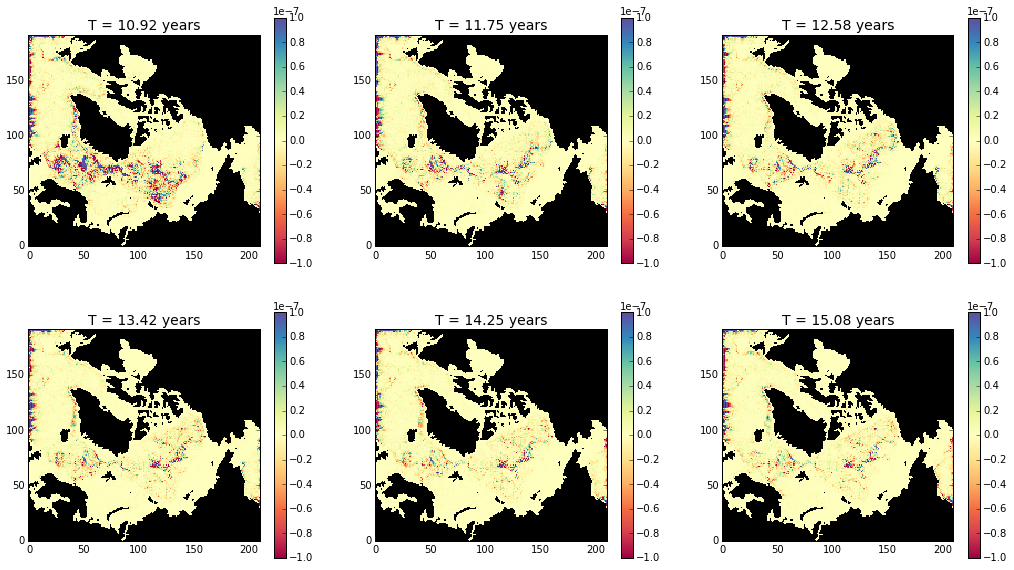

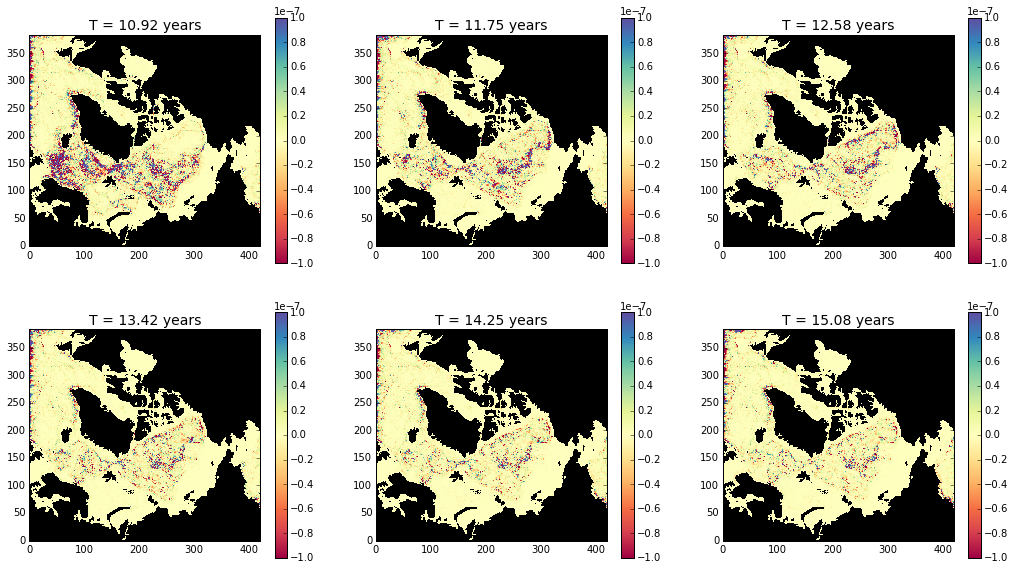

In [89]:
plot_field(np.nanmean(run_pert2.vort['div'][times_vort,:,:,:],axis=1),years[times_vort],-0.0000001,0.0000001,matplotlib.cm.Spectral,'black','')
plot_field(np.nanmean(run_pert18.vort['div'][times_vort,:,:,:],axis=1),years18[times_vort18],-0.0000001,0.0000001,matplotlib.cm.Spectral,'black','')

In [ ]:
def plot_field_gif(field,years,vimin,vimax,cmap,setbad,unity,title,origin='lower',row=1,col=1):
    # This function produces a gif animation of the field                                                                             \                                                                                                                                       
    # All the parameters are the same as the previous                                                                                 \                                                                                                          
    vimin = vimin
    vimax = vimax
    fig, ax = plt.subplots(nrows=row, ncols=col)
    for i in range(len(years)):
        ax.set_title("T = "+str(np.round(years[i],2))+" years")
        masked_array = np.ma.array(field[i,:,:], mask=np.isnan(field[1,:,:]))
        cmap= cmap
        cmap.set_bad(setbad,1.)
        ca = ax.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap,aspect='auto',origin=origin)
        if i == 0:
            cbar = fig.colorbar(ca , ax=ax, )
            cbar.ax.set_ylabel(unity)
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
            item.set_fontsize(14)

        if i < 10:
            zeros = '000'
        elif i < 100:
            zeros = '00'
        else:
            zeros = '0'
        sout = '/scratch/general/am8e13/gifs/'
        fig.savefig(sout+str(title)+zeros+str(i)+'.png',dpi=300)
        clf
    os.system("convert -delay 1 -dispose Background +page " + str(sout) \
          + "/*.png -loop 0 " + str(sout) + "/animation_"+title+".gif")
    os.system("rm "+str(sout)+"*png")
    sout = '/scratch/general/am8e13/gifs/'

In [ ]:
#plot_field_gif(np.nanmean(HDiv[30:100,:,:,:],axis=1),years[30:100],-0.0000001,0.0000001,matplotlib.cm.Spectral,'black','','hdiv')
#plot_field_gif(np.nanmean(KE[30:100,:,:,:],axis=1),years[30:100],0,0.1,matplotlib.cm.Blues,'black','','KinEn')
#plot_field_gif(np.nanmean(Vort3[30:100,:,:,:],axis=1),years[30:100],-0.00001,0.00001,matplotlib.cm.seismic,'black','','vorticity')
#plot_field_gif(np.nanmean(MXLDEPTH[30:100,:,:,:],axis=1),years[30:100],0,30,matplotlib.cm.jet,'black','','mixlay')

In [ ]:
#!ncdump -h /hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation1/results/dynDiag.nc

In [ ]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/dynDiag.nc",'r')
MXLDEPTH = file2read.variables['MXLDEPTH']
MXLDEPTH = MXLDEPTH[range(0,400,3)]*1

In [ ]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/dynDiag.nc",'r')
T = file2read.variables['T']
T = T[range(0,400,3)]*1
years = T/(60*60*24*360)-T[0]/(60*60*24*360)
times_vort = [39,40,43,46,50,55]

In [ ]:
#times_vort = [39,40,41,42,43,44]
times_vort = [41,42,43,44,45,46]
plot_field(np.nanmean(MXLDEPTH[times_vort,:,:,:],axis=1),years[times_vort],0,50,matplotlib.cm.jet,'black','')

In [ ]:
times_ave = np.array([0,1,5,6,7,4])
averagesT = np.zeros_like(run_pert2.data['T'][time_new,:,:,:])
averagesS = np.zeros_like(run_pert2.data['T'][time_new,:,:,:])
for i in range(6):
    if times_ave[i] == 2:
        averagesT[i,:,:,:] = np.nanmean(run_pert2.data['T'][times_ave[i]+range(0,30,8)+range(1,30,8),:,:,:],axis=0)
        averagesS[i,:,:,:] = np.nanmean(run_pert2.data['S'][times_ave[i]+range(0,30,8)+range(1,30,8),:,:,:],axis=0)
    else:
        averagesT[i,:,:,:] = np.nanmean(run_pert2.data['T'][times_ave[i]+range(0,30,8),:,:,:],axis=0)
        averagesS[i,:,:,:] = np.nanmean(run_pert2.data['S'][times_ave[i]+range(0,30,8),:,:,:],axis=0)  

In [ ]:
def interact(field,cmap1,vimin1,vimin2,vimax1,vimax2,time1,time2):
    def plot_field2(vimin=1,vimax=20,time=0,Z=0):
        # This function plots a 2D field, the field is meant to have NaNs on the land place                                                
        # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar                          
        # cmap is a colomap                                                                                                               
        fig,axes = plt.subplots(1,1)
        masked_array = np.ma.array(field[time,:,:], mask=np.isnan(field[time,:,:]))
        cmap= cmap1
        cmap.set_bad('black',1.)
        ca = imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',cmap = cmap ,origin="upper")
        cbar = fig.colorbar(ca )
        fig.subplots_adjust(right=2.4,top=2)
        return plot_field2
        
    w = interactive(plot_field2,vimin=(vimin1,vimin2),vimax=(vimax1,vimax2),time=(time1,time2),Z=(time1,time2))
    display(w)
interact(run_pert18.data['T'][:,:,100*2,37*2:48*2],matplotlib.cm.jet,-1,0,0,20,time1=0,time2=50)

In [ ]:
interact(run_pert18.data['T'][:,:,58*2:80*2,76*2],matplotlib.cm.jet,-1,0,0,20,time1=0,time2=50)

run_pert2 FluxMidS
run_pert18 FluxMidS
run_pert2 FluxTopT
run_pert18 FluxTopT
run_pert2 FluxTopS
run_pert18 FluxTopS
run_pert2 FluxMidT
run_pert18 FluxMidT
run_pert2 FluxBotT
run_pert18 FluxBotT
run_pert2 FluxBot
run_pert18 FluxBot
run_pert2 FluxTop
run_pert18 FluxTop
run_pert2 FluxMid
run_pert18 FluxMid
run_pert2 FluxBotS
run_pert18 FluxBotS


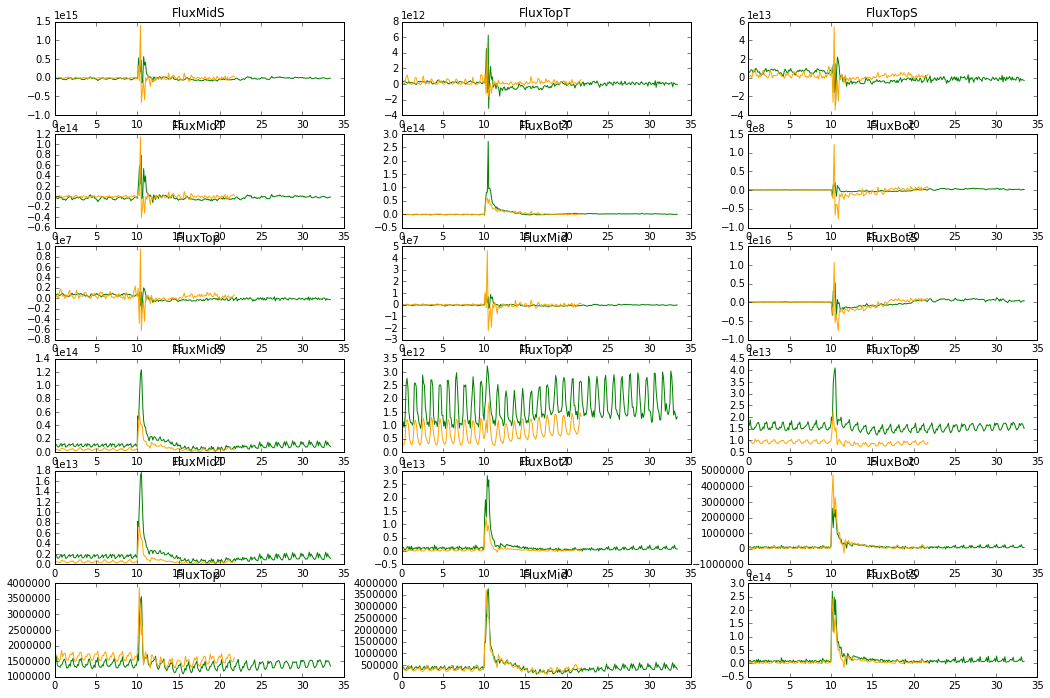

In [93]:
#monitor = {'run_pert0' : run_pert0 , 'run_pert1' : run_pert1 , 'run_pert2' : run_pert2}
monitor = {'run_pert18' : run_pert18,'run_pert2':run_pert2}
variables = {'FluxTop' : 'FluxTop' , 'FluxTopS' : 'FluxTopS' , 'FluxTopT' : 'FluxTopT' ,\
            'FluxMid' : 'FluxMid' , 'FluxMidS' : 'FluxMidS' , 'FluxMidT' : 'FluxMidT' ,\
             'FluxBot' : 'FluxBot' , 'FluxBotS' : 'FluxBotS' , 'FluxBotT' : 'FluxBotT' }
colors = {'run_pert0': 'blue' , 'run_pert1' : 'red' , 'run_pert2' : 'green' , 'run_pert18' : 'orange'}

# free-surface_anomaly evolution
def plot_flux_part(var_list,monitor_list,location):
    fig, axes = plt.subplots(6,3)
    ax_ind = 0
    for var in var_list:  
        for mon in monitor_list:
            print mon,var
            axes.flat[ax_ind].plot(monitor_list[mon].years,monitor_list[mon].FramPart[var],colors[mon])
            axes.flat[ax_ind+9].plot(monitor_list[mon].years,monitor_list[mon].DenmarkPart[var],colors[mon])
            #axes.flat[ax_ind+6].plot(monitor_list[mon].years,monitor_list[mon].Denmark[var],colors[mon])
            #axes.flat[ax_ind+9].plot(monitor_list[mon].years,monitor_list[mon].Norwice[var],colors[mon])
        axes.flat[ax_ind].set_title(var)
        axes.flat[ax_ind+9].set_title(var)
        ax_ind += 1        
    fig.subplots_adjust(right=2.4,top=2.4)
    
plot_flux_part(variables,monitor,'Fram')

In [96]:
!ncdump -h /hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/state.nc

ncdump: /usr/lib64/libjpeg.so.62: no version information available (required by ncdump)
netcdf state {
dimensions:
	T = UNLIMITED ; // (625 currently)
	Xp1 = 211 ;
	Y = 192 ;
	Z = 50 ;
	X = 210 ;
	Yp1 = 193 ;
	Zl = 50 ;

variables:
	double Xp1(Xp1) ;
		Xp1:long_name = "i-index of cell corner" ;
		Xp1:units = "none" ;
	double Y(Y) ;
		Y:long_name = "j-index of cell center" ;
		Y:units = "none" ;
	double Z(Z) ;
		Z:long_name = "vertical coordinate of cell center" ;
		Z:units = "meters" ;
		Z:positive = "up" ;
	double X(X) ;
		X:long_name = "i-index of cell center" ;
		X:units = "none" ;
	double Yp1(Yp1) ;
		Yp1:long_name = "j-index of cell corner" ;
		Yp1:units = "none" ;
	double Zl(Zl) ;
		Zl:long_name = "vertical coordinate of upper cell interface" ;
		Zl:units = "meters" ;
		Zl:positive = "up" ;
	double T(T) ;
		T:long_name = "model_time" ;
		T:units = "seconds since 1979-01-01, 00:00:00" ;
	long iter(T) ;
		iter:long_name = "iteration_count" ;
	float U(T, Z, Y, Xp1) ;
		U:units = "m/

In [152]:
time_new2_eta = [182, 186, 192 ,198, 214, 240]
print time_new2_eta
time_new18_eta = [364, 378, 390, 400, 430, 490]
print time_new18_eta

[182, 186, 192, 198, 214, 240]
[364, 378, 390, 400, 430, 490]


In [153]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_perturbation2/results/state.nc",'r')
run_pert2_ETA = file2read.variables['Eta']
run_pert2_ETA = run_pert2_ETA[time_new2_eta]*1
run_pert2_time = file2read.variables['T']
run_pert2_time = run_pert2_time[time_new2_eta]*1
time2_0 = file2read.variables['T']
time2_0 = time2_0[0]*1

In [154]:
file2read = netcdf.NetCDFFile("/hpcdata/scratch/am8e13/arctic420x384/run_perturbation/results/state.nc",'r')
run_pert18_ETA = file2read.variables['Eta']
run_pert18_ETA = run_pert18_ETA[time_new18_eta]*1
run_pert18_time = file2read.variables['T']
run_pert18_time = run_pert18_time[time_new18_eta]*1
time18_0 = file2read.variables['T']
time18_0 = time18_0[0]*1

In [155]:
# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results36km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
bathy2=file2read.variables['HFacC']
bathy2=bathy2[:]*1

# Bathy is 1 on land and 0 over sea
x="/scratch/general/am8e13/results18km"
os.chdir(x) 
file2read = netcdf.NetCDFFile("grid.nc",'r')
bathy18=file2read.variables['HFacC']
bathy18=bathy18[:]*1

In [156]:
run_pert2_ETA[:,bathy2[0,:,:]==0] = np.nan
run_pert18_ETA[:,bathy18[0,:,:]==0] = np.nan

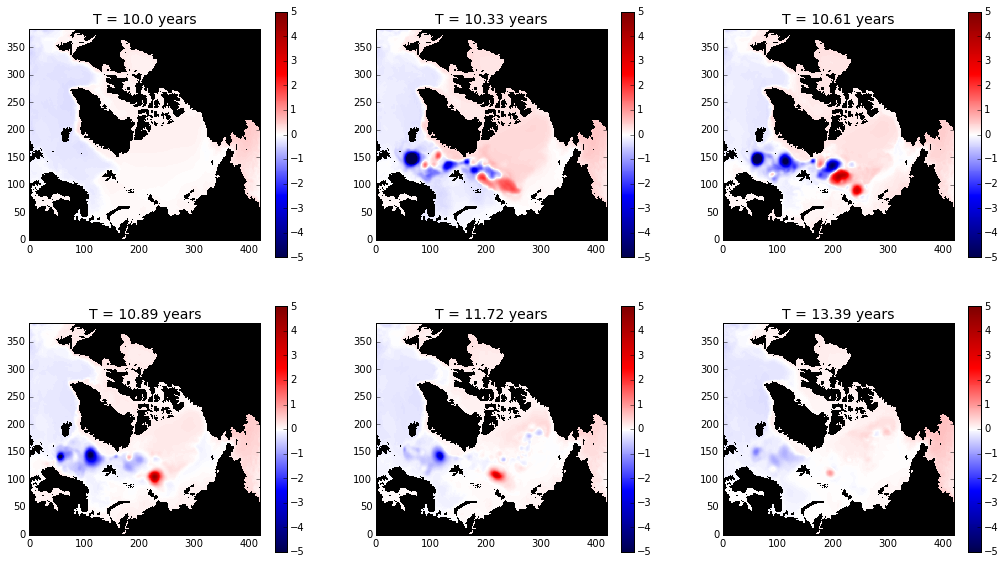

In [157]:
plot_field(run_pert18_ETA,(run_pert18_time - time18_0)/(60*60*24*360),-5,5,matplotlib.cm.seismic,'black','')

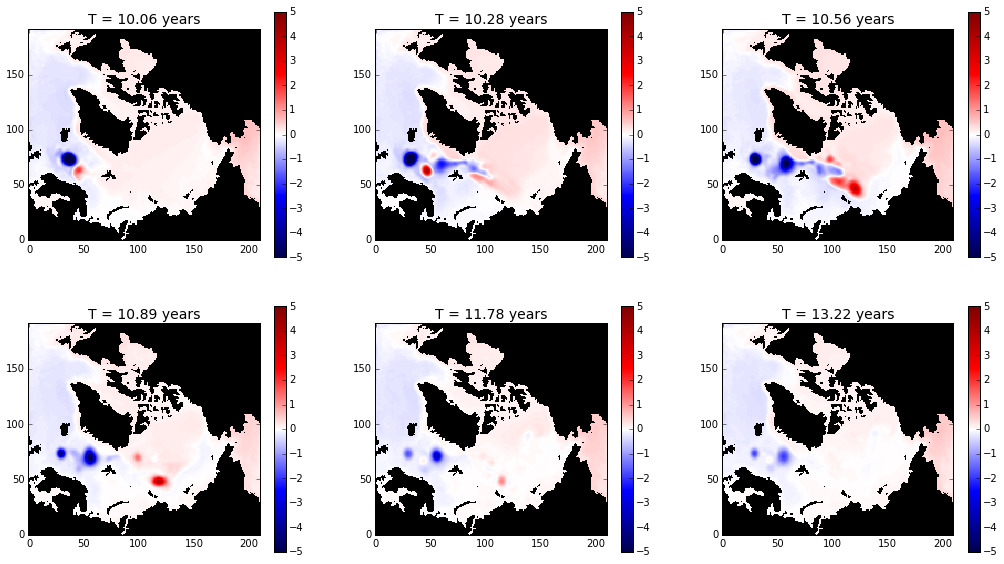

In [158]:
plot_field(run_pert2_ETA,(run_pert2_time - time2_0)/(60*60*24*360),-5,5,matplotlib.cm.seismic,'black','')